## Data Wrangling of the Capstone Project

Data wrangling is the process of cleaning data, restructure of data, and re-format of data.The data used by this project is very much cleaned before analysis. Data cleaning is mainly involved in the part of Feature emgineering for extracting words from consumer reviews. The other data wrangling works are restructure of data, and data format transforming.
<ul>
<li> Missing Value
    <br>
    I used some data wrangling function to discover insight into how the missing Value is processe. 
<li> Data cleaning is needed in the part of Feature engineering. 
<ul>
<li>First load .tsv data file as a Python Pandas DataFrame.
<li>Then import import stopwords from nltk.corpus,from nltk.tokenizeimport word_tokenize,from string import punctuation,import re. Apply the functions of these library on the "verified_review"column to remove stopwords, puctuation, and some words do not make any sense at all. The database operation with Python are also involved in this process.
</ul>
<li>Lots of data restructure and dataformat transforming works are needed in each phrase of the project.
In the phrase of EDA & Visualiztion, I need to extract specific columns or rows of the dataset based on the plot requirements. Sometimes some functions of Pandas DataFrame or NumPy are applied on the extracted data to transform the type of data to another format, or to get the value like mean value, that kinds of value.
<li>To summarize, the data structures are very important for data wrangling. List, NumPy array, tuple, dictionary, DataFrame of Pandas are the essencial skill for data wrangling. Please refer to my Notebook on the Github for details about data wrangling. <href>http://localhost:8889/notebooks/portfolio/amazon-alexa-review%20(1).ipynb# 
</ul>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from scipy import stats

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from string import punctuation
import re
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tinawang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tinawang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tinawang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
df=pd.read_csv('amazon_alexa.tsv',sep='\t')

In [5]:
print('Shape of DataFrame is {}'.format(df.shape))
df.head()

Shape of DataFrame is (3150, 5)


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


#### 1. Missing value - Verified_reviews

In [5]:
df.loc[df['verified_reviews']==' ']

,rating,date,variation,verified_reviews,feedback
85,5,30-Jul-18,Heather Gray Fabric,,1
183,3,29-Jul-18,Heather Gray Fabric,,1
219,5,29-Jul-18,Sandstone Fabric,,1
374,1,26-Jul-18,Black,,0
406,1,16-Jul-18,White,,0
524,2,20-Jun-18,White,,0
654,5,26-May-18,Black,,1
780,5,30-Jul-18,Heather Gray Fabric,,1
878,3,29-Jul-18,Heather Gray Fabric,,1
914,5,29-Jul-18,Sandstone Fabric,,1


<b>Analysis:</b> As we can see, the missing values in "verified_reviews" column are replaced with " ". This does make sense for sentiment analysis..

#### 2. Data Cleaning 
Need to clean the words extracted from the "verified_reviews", like remove puctuations, stopwords, etc. 

#### Data Preprocessing

In [26]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [27]:
review_text = df.loc[:,['verified_reviews']]
review_text['index'] = review_text.index
documents = review_text
documents[:5]

,verified_reviews,index
0,Love my Echo!,0
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",2
3,I have had a lot of fun with this thing. My 4 ...,3
4,Music,4


In [31]:
doc_sample = documents[documents['index'] == 0].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Love', 'my', 'Echo!']

 tokenized and lemmatized document: 
['love', 'echo']


In [32]:
processed_docs = documents['verified_reviews'].map(preprocess)
processed_docs[:10]

0                                         [love, echo]
1                                               [love]
2    [play, game, answer, question, correct, alexa,...
3    [thing, learn, dinosaur, control, light, play,...
4                                              [music]
5    [receiv, echo, gift, need, bluetooth, play, mu...
6    [have, cellphon, featur, ipad, great, alarm, d...
7    [think, purchas, work, get, room, hous, like, ...
8                                        [look, great]
9    [love, listen, song, haven, hear, childhood, n...
Name: verified_reviews, dtype: object

In [33]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 echo
1 love
2 abl
3 alexa
4 answer
5 away
6 correct
7 game
8 home
9 light
10 like


In [34]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[0]

[(0, 1), (1, 1)]

In [37]:
bow_doc_0 = bow_corpus[0]
print(bow_doc_0)

for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                                     dictionary[bow_doc_0[i][0]], 
                                                     bow_doc_0[i][1]))

[(0, 1), (1, 1)]
Word 0 ("echo") appears 1 time.
Word 1 ("love") appears 1 time.


In [39]:
df['cleaned_reviews']=processed_docs
df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,"[love, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,[love]
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"[play, game, answer, question, correct, alexa,..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,"[thing, learn, dinosaur, control, light, play,..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,[music]


#### 3.Data Restructure and Data Format Transforming 
This kind of works are needed nearly in the all phrases of lifecycle of the project. I am going to give 2 examples here. 

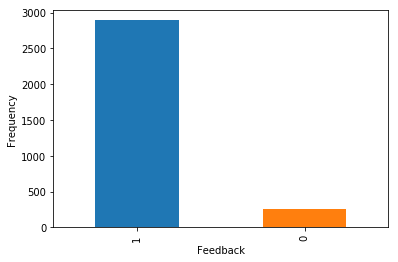

In [10]:
df['feedback'].value_counts().plot(kind='bar')
plt.xlabel('Feedback')
plt.ylabel('Frequency')
plt.show()

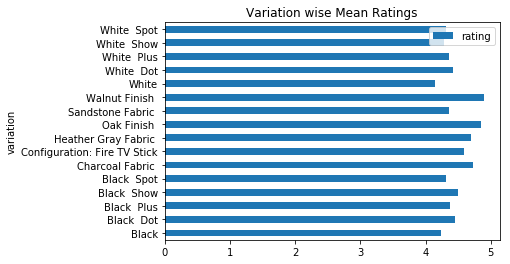

In [11]:
df.groupby('variation').mean()[['rating']].plot.barh()
plt.title("Variation wise Mean Ratings");